In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-04-25 to 2019-07-09 - 121


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

93


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
USMV,47,0.634466,1.499196,0.396735,6.658292,2.180427
SPLV,47,0.605954,1.527005,0.370838,6.474606,2.660443
MTUM,47,0.712251,1.857395,0.362103,7.422088,2.859384
PDP,47,0.573048,2.122771,0.251259,5.933125,3.974186
VIG,47,0.426474,1.765253,0.219114,4.302389,4.634193
FVD,47,0.364191,1.510973,0.214768,3.743768,3.793309
FPX,47,0.474445,2.124129,0.204678,5.743713,5.445800
FTCS,47,0.375731,1.864005,0.180283,3.480830,5.011633
ADX,47,0.366191,1.815992,0.179796,4.005463,5.318352


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted USA 0.870 0.786
evicted XSLV 0.734 0.679
retry backlogs ['HDV', 'VTI', 'ONEQ', 'FTCS', 'VONG', 'DGRW', 'QDF', 'DGRO', 'VYM', 'SPYV', 'SUSA', 'VONV', 'SCHD', 'VB', 'SPTM', 'SPYG', 'MGC', 'IVE', 'IUSV', 'ITOT', 'VTV', 'MGV', 'SPHD', 'VV', 'IWV', 'IWB', 'IUSG', 'SPY', 'IWP', 'IWF', 'IJK', 'VO', 'MGK', 'FNDX', 'SCHX', 'RPG', 'IWS', 'SCHB', 'PRF', 'OEF', 'IVV', 'SPLG', 'NOBL', 'DLN', 'IWY', 'SCHV', 'VOOG', 'VONE', 'VOO', 'SCHG', 'SDY', 'IYY', 'JHMM', 'IWR', 'DIA', 'DSI', 'IVW', 'RSP', 'FVD', 'DON', 'SPHQ', 'QUAL', 'IWD', 'VXF', 'MDYG', 'VIG', 'XMLV', 'GSLC', 'SCHM', 'DVY', 'LRGF', 'VUG', 'VOE', 'SPYD', 'SPLV', 'FEX', 'FDL', 'FV', 'PKW', 'TILT', 'VOT', 'PDP', 'FPX', 'QQQ', 'JKE', 'VBK', 'SDOG', 'PWV', 'ADX', 'MTUM'] at 0.905 - 0.3967346971218168
evicted VBK 0.897 0.768
evicted FDL 0.860 0.854
retry backlogs ['SPHD', 'FTCS', 'HDV', 'IWV', 'IWB', 'SPYV', 'QDF', 'VTI', 'MGV', 'VTV', 'VOOG', 'PRF', 'SPYG', 'VYM', 'VONG', 'ONEQ', 'VV', 'VXF', 'MDYG', 'SUSA', 'QUAL', 'SCHB', 'OEF', 'DGRW',

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
USMV,47.0,0.634466,1.499196,-1.764315,-0.507887,0.457625,1.538688,4.297077,0.396735,6.658292,2.180427
Portfolio,47.0,0.634466,1.499196,-1.764315,-0.507887,0.457625,1.538688,4.297077,0.396735,6.658292,2.180427


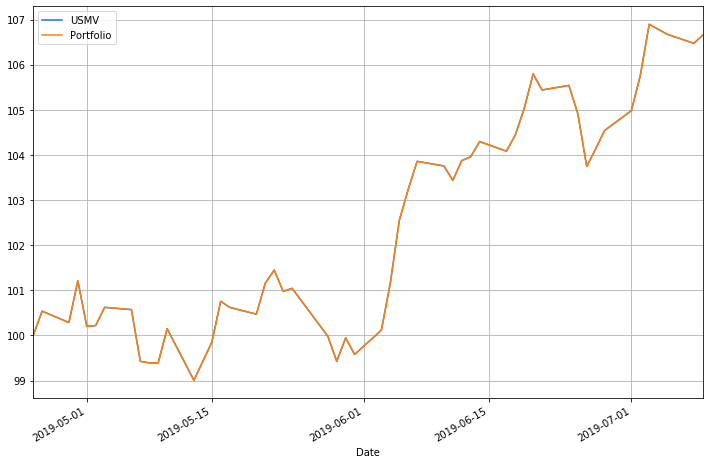

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

In [5]:
Quote(screen_funds('Equities', 'Domestic', 'Preferred'), 75, 5).statistics()

,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
PGX,47,0.218172,0.299527,0.595905,2.149477,0.582894
FPE,47,0.254131,0.388008,0.552689,2.746767,0.570249
VRP,47,0.202950,0.336282,0.485506,1.796739,0.657068
PFF,47,0.214118,0.421199,0.414140,1.957128,0.754922
PGF,47,0.194166,0.410245,0.376564,1.854752,0.876261
